In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:

# Load the CSV file
file_path = 'Resources/daily_returns_master.csv'  
# Update this path
data = pd.read_csv (file_path)


In [10]:

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values(by='date')


In [11]:

# Forward-fill missing daily_return values
data['daily_return'] = data['daily_return'].ffill()



In [12]:
#Get all stock symbols in dataset
symbols = data['symbol'].unique()

# split the data up by dataframe
data_split = []
for symbol in symbols:
    temp_df = data[data['symbol'].eq(symbol)].copy()
    data_split.append((symbol, temp_df))

In [13]:
for _, df in data_split:
    # Calculate cumulative returns
    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1


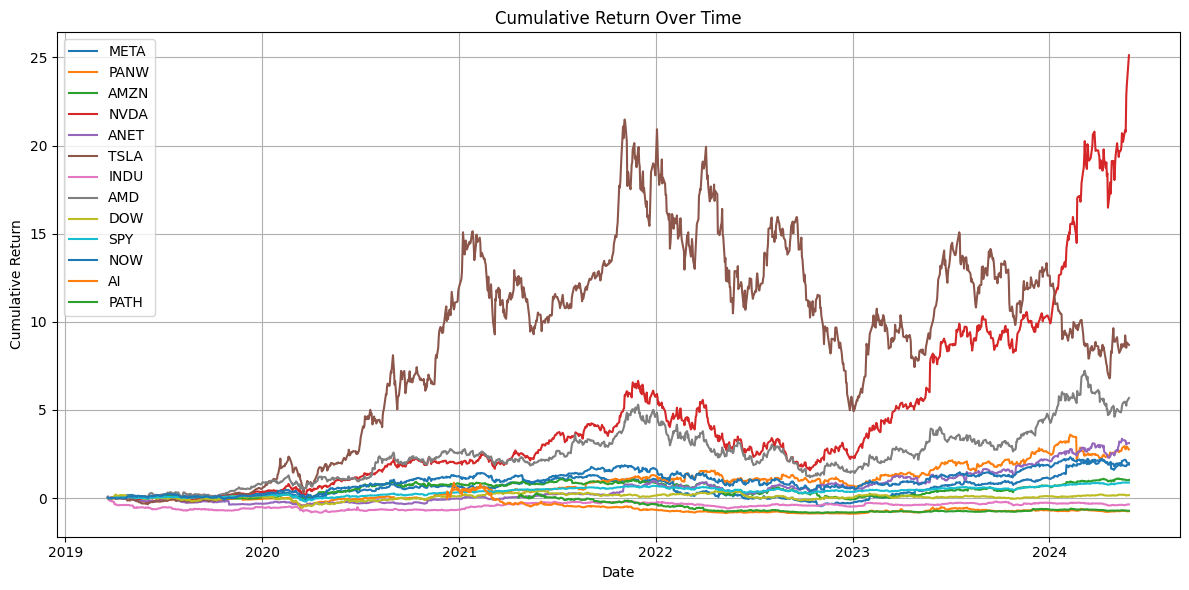

In [15]:

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
for symbol, data in data_split:
    plt.plot(data['date'], data['cumulative_return'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

#save fig before show or else it saves an empty canvas
plt.savefig('Plots/cumulative_returns_all.png')

# Show the plot
plt.show()

# Save the figure
plt.close()
